In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [13]:
# Define directories
train_dir = 'dataset/Kather_texture_2016_image_tiles_5000/train'
val_dir = 'dataset/Kather_texture_2016_image_tiles_5000/validation'
test_dir = 'dataset/Kather_texture_2016_image_tiles_5000/test'

In [14]:
# Define image parameters
image_size = (150, 150)
batch_size = 32
num_classes = 8

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=True
)

Found 4000 images belonging to 8 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 496 images belonging to 8 classes.


In [19]:
# Evaluate the modeln
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 504 images belonging to 8 classes.


In [2]:
from utils.metrics import performance
from utils.models import alexnet, googlenet, resnet

In [21]:
alexnet = alexnet((150, 150, 3), 8)

In [22]:
alexnet.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# alexnet.fit(train_generator, validation_data=validation_generator, epochs=50)

In [19]:
# alexnet.save('Alexnet.keras')

Google Net

In [ ]:
googlenetModel = googlenet((150, 150, 3), 8)

In [108]:
googlenetModel.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
googlenetModel.fit(train_generator, validation_data=validation_generator, epochs=50)

In [110]:
googlenetModel.save('GoogleNet.keras')

In [ ]:
performance(googlenetModel, test_generator)

In [2]:
resnetModel = resnet((150,150,3), 8)

In [14]:
resnetModel.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnetModel.fit(train_generator, validation_data=validation_generator, epochs=50)

In [17]:
resnetModel.save('models/ResNet.keras')

In [2]:
import tensorflow as tf

In [3]:
resnet = tf.keras.models.load_model('models/ResNet.keras')

In [ ]:
performance(resnet, test_generator)

In [3]:
# Define directories
train_dir_2 = 'dataset_2/train'
val_dir_2 = 'dataset_2/validation'
test_dir_2 = 'dataset_2/test'

In [4]:
# Define image parameters
image_size = (150, 150)
batch_size = 32
num_classes = 2

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir_2,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=True
)
validation_generator = test_datagen.flow_from_directory(
    val_dir_2,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_dir_2,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',  # For multiclass classification
    shuffle=False
)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [8]:
alexnet_2 = googlenet(input_shape = (150, 150, 3), num_classes=2)
alexnet_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
alexnet_2.fit(train_generator, validation_data=validation_generator, epochs=50)
alexnet_2.save('GoogleNet_2.keras')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4776 - loss: 0.9409 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4939 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 988ms/step - accuracy: 0.5257 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5010 - loss: 0.6941 - val_accuracy: 0.4950 - val_loss: 0.6915
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5373 - loss: 0.6873 - val_accuracy: 0.5110 - val_loss: 0.6884
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5475 - loss: 0.6849 - val_accuracy: 0.6930 - val_loss: 0.6820
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6047 - loss: 0.6886 - val_accuracy: 0.5120 - val_loss: 0.6905
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4844 - loss: 0.6903 - val_accuracy: 0.5000 - val_lo

126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Accuracy: 92.06349206349206


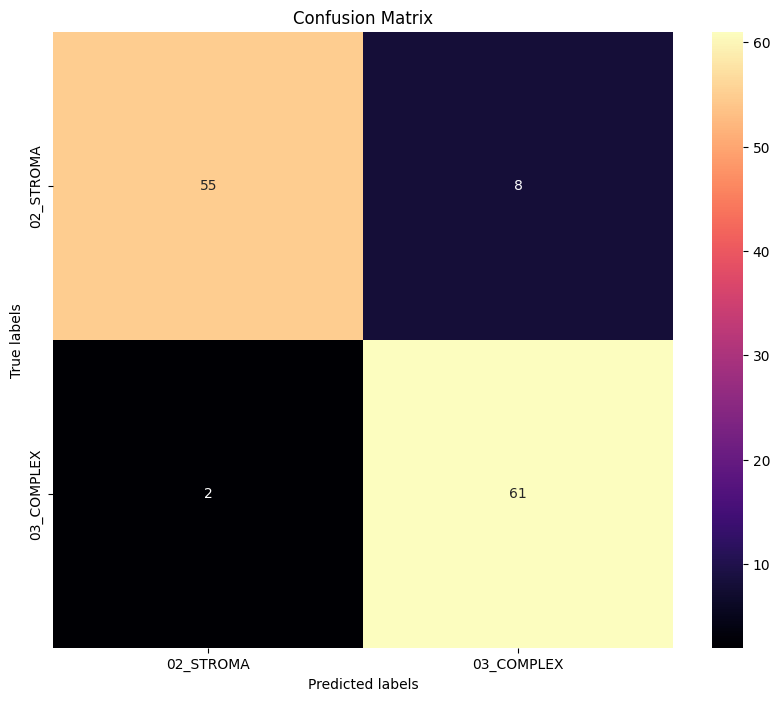

In [10]:
performance(test_generator, alexnet_2)

DATASET - 2